## Dynamical analysis: Check accuracy of data and plot DSF - Step 2

We want to compute the `Dynamical Structure Factor`, which is given by

$$ S_{\vec{q}}(w) = \sum_{n=1}^{nev} \left| \left\langle \Psi_n^X \left| \hat{S}_{\vec{q}}^{\alpha} \right| \Psi_0 \right\rangle \right| ^2 \delta(\omega - (E_n^X - E_0)) $$

$$ S_{\vec{q}}(w) = \sum_{n=1}^{nev} \left| \left\langle \Psi_n^X \left| \hat{S}_{\vec{q}}^{\alpha} \right| \Psi_0 \right\rangle \right| ^2 \frac{1}{\pi} \frac{\epsilon^2}{(\omega - (E_n^X - E_0))^2 + \epsilon^2} $$

Where

$$ \hat{S}_{\vec{q}}^{\alpha} = \frac{1}{\sqrt{L}} \sum_{i = 0}^{L-1} e^{i \vec{q} \cdot \vec{r}_i} \hat{S}_i^{\alpha} $$

So, we can rewrite the DSF as:
$$ S_{\vec{q}}(w) = \sum_{n=1}^{nev} \left| \left\langle \Psi_n^X \left| \frac{1}{\sqrt{L}} \sum_{i=0}^{L-1} e^{i \vec{q} \cdot \vec{r}_i} \hat{S}_i^{\alpha} \right| \Psi_0 \right\rangle \right| ^2 \frac{1}{\pi} \frac{\epsilon^2}{(\omega - (E_n^X - E_0))^2 + \epsilon^2} $$

$$ S_{\vec{q}}(w) = \sum_{n=1}^{nev} \left| \frac{1}{\sqrt{L}} \sum_{i=0}^{L-1} e^{i \vec{q} \cdot \vec{r}_i} \left\langle \Psi_n^X \left| \hat{S}_i^{\alpha} \right| \Psi_0 \right\rangle \right| ^2 \frac{1}{\pi} \frac{\epsilon^2}{(\omega - (E_n^X - E_0))^2 + \epsilon^2} $$

From the code we obtain a file with two columns: 
1. the first one, has the values of $ \Delta_n = E_n^X -E_0 $
2. the second one, has the values of the coefficient $ \left\langle \Psi_n^X \left| \hat{S}_i^{\alpha} \right| \Psi_0 \right\rangle $

In [1]:
import numpy as np
import cmath as m
import matplotlib.pyplot as plt
import csv
from mpl_toolkits.mplot3d import axes3d
from matplotlib.collections import PolyCollection
#%matplotlib notebook

### Parameters

In [2]:
# Lattice

dim      = 2       # Dimension of the lattice
nspins   = 24      # Number of spins in the system

Lx       = 4       # Number of spins in the system in x direction
Ly       = 6       # Number of spins in the system in y direction

rep      = 200     # Disorder realizations
nev      = 200     # Number of excited states used

In [3]:
# Reciprocal lattice

nQ       = nspins  # Number of q values to analyse

pi       = np.arccos(-1)
q_idx    = [i for i in range(nQ)]
q_idxX   = [(i//Ly)*2*pi/Lx for i in q_idx]
q_idxY   = [(i%Ly)*2*pi/Ly for i in q_idx]

q_X      = [(i//Ly) for i in q_idx]
q_Y      = [(i%Ly) for i in q_idx]

In [4]:
# Hamiltonian parameters

J1           = 1.0      # Nearest neighbours coupling
D1           = 0.0      # Nearest neighbours anisotropy
J2           = 0.70     # Next-nearest neighbours coupling
D2           = 0.0      # Next-nearest neighbours anisotropy
dis_strength = 0.6      # Strength of the disorder

In [5]:
# Frequency parametes

nW       = 5001         # Number of frequency values to plot
w_min    = 0            # Minimum value of frequency to plot
w_max    = 5            # Maximum value of frequency to plot
epsilon  = 1.0/nspins   # Constant to compute the Dirac delta function

In [6]:
# Files

root        = '/home/ale/MAIN24/'

pathINdata  = root + 'dis' + str(dis_strength) + '/' + str(nspins) + 'nnn' + "{:2.2f}".format(J2) + '/'
pathOUTdata = root + 'dis' + str(dis_strength) + '/' + str(nspins) + 'nnn' + "{:2.2f}".format(J2) + '/'

### 1. Read data from file

In [7]:
Sw = np.zeros((nW,nQ))

with open(pathINdata + 'Sq.csv') as csvfile:
        tmp_read_Sw = np.genfromtxt(csvfile)
Sw = tmp_read_Sw[:,1:]

### 2. Checks

#### 2a. Sum rule: $ \sum_{\vec{q}} \int \frac{d\omega}{2\pi} S^{\gamma}_{\vec{q}}(\omega) = \frac{1}{4} 
\rightarrow 
\frac{\Delta\omega}{2\pi} \sum_{\vec{q}} \sum_i^{nW} S^{\gamma}_{\vec{q}}(\omega_i) = \frac{1}{4}$

In [8]:
delta_w  = (w_max - w_min)/(nW - 1)
sum_rule = np.sum(Sw) * delta_w / (2*pi)
e_msg = "Sum rule does not match: sum_rule = " + str(sum_rule)
if abs(sum_rule - 0.25) >= 0.01:
    print("WARNING!!")
    print(e_msg)
#assert abs(sum_rule - 0.25)<0.01, e_msg

WARNING!!
Sum rule does not match: sum_rule = 0.14722967511447338


#### 2b. Dispersion relationship (ONLY FOR 1D)

In [9]:
if dim == 1:
    # Get the positions of the highest peak for each q
    disp_w = np.argmax(Sw,axis=0)

    disp_fig, disp_ax = plt.subplots()

    # Plot dispersion along y axis
    #x0 = 2
    #q_y = np.zeros((Ly))
    #for i in range(Ly):
    #q_y[i] = i + x0 * Lx
    #qy = q_y.astype(int)
    #print(qy)

    disp_ax.set_title('Dispersion w(q=2pi/L * n)')
    disp_ax.set_ylabel('w(q)')
    disp_ax.set_xlabel('q')
    disp_ax.grid()
    disp_ax.plot(q/Ly*2*pi, disp_w*delta_w)
    disp_ax.plot(q/Ly*2*pi,pi/2*abs(np.sin(q/Ly*2*pi)))

#### 2b. Dispersion relationship (ONLY FOR 2D)

In [10]:
if dim == 2 and nspins == 16:
    # Get the positions of the highest peak for each q
    disp_w = np.argmax(Sw,axis=0)
    
    # q values for plotting
    q = np.linspace(0,nQ-1,nQ)

    disp_fig, disp_ax = plt.subplots(1,2,gridspec_kw={'wspace':0.5, 'hspace': 0.5}, figsize=(20,5))

    # Plot dispersion along y axis
    x0 = 2
    q_y = np.zeros((Ly))
    for i in range(Ly):
        
        q_y[i] = i + x0 * Lx
        qy = q_y.astype(int)
    print('Values of q printing (along Y):', qy)

    disp_ax[0].set_title('Dispersion w(q=2pi/L * n) along Y')
    disp_ax[0].set_ylabel('w(q)')
    disp_ax[0].set_xlabel('q')
    disp_ax[0].grid()
    disp_ax[0].plot(q[0:4]/Ly*2*pi, disp_w[qy]*delta_w, label="data")
    disp_ax[0].plot(q[0:4]/Ly*2*pi,np.sqrt(4-(np.cos(x0/Lx*2*pi)+np.cos(q[0:4]/Ly*2*pi))**2), label="ref")
    disp_ax[0].legend()
    
    # Plot dispersion along x axis
    y0 = 1
    q_x = np.zeros((Lx))
    for i in range(Lx):
        q_x[i] = Ly * i + y0
        qx = q_x.astype(int)
    print('Values of q printing (along X):', qx)

    disp_ax[1].set_title('Dispersion w(q=2pi/L * n) along X')
    disp_ax[1].set_ylabel('w(q)')
    disp_ax[1].set_xlabel('q')
    disp_ax[1].grid()
    disp_ax[1].plot(q[0:4]/Lx*2*pi, disp_w[qx]*delta_w, label="data")
    disp_ax[1].plot(q[0:4]/Lx*2*pi,np.sqrt(4-(np.cos(q[0:4]/Lx*2*pi)+np.cos(y0/Ly*2*pi))**2), label="ref")
    disp_ax[1].legend()

### 3. Plot for every q separately

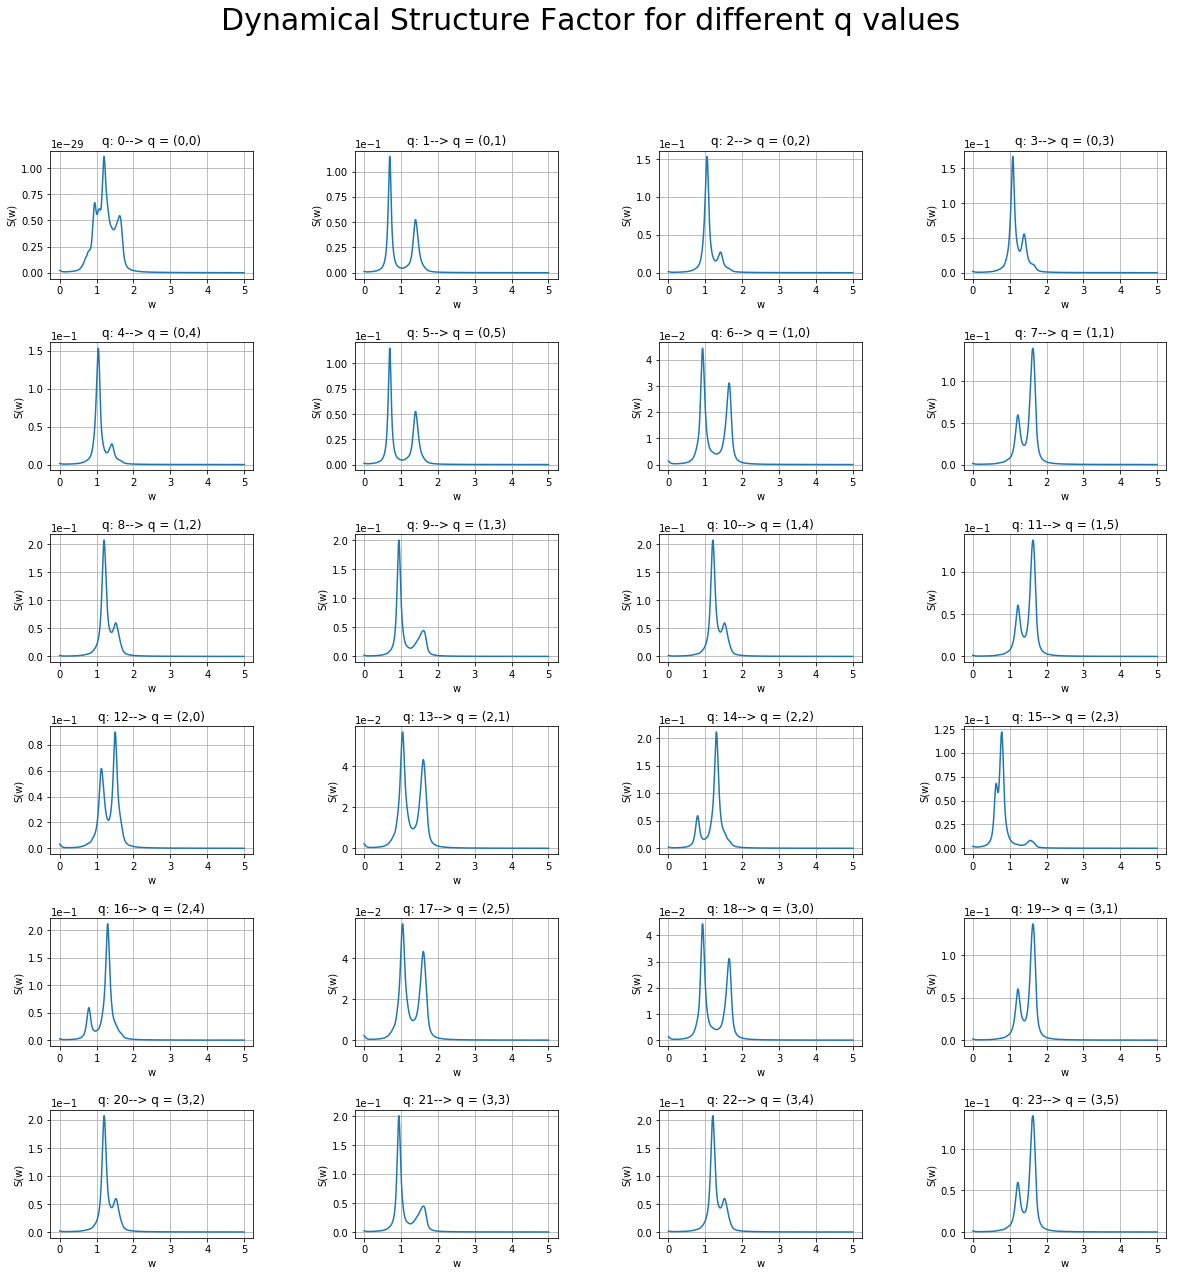

In [11]:
# Plot 1D chain lattices
subsX = nQ//4
subsY = 4

w  = np.linspace(w_min,w_max,nW)

q_idxX_labl   = [(i//Ly) for i in q_idx]
q_idxY_labl   = [(i%Ly) for i in q_idx]

fig, ax = plt.subplots(subsX, subsY, gridspec_kw={'wspace':0.5, 'hspace': 0.5}, figsize=(20,20))
fig.suptitle("Dynamical Structure Factor for different q values", fontsize=30)


for i in range(subsX):
    for j in range(subsY):
        qij = i*subsY + j
        if qij >= nQ:
            break
        ax[i,j].set_title('q: ' + str(q_idx[qij]) + '--> q = (' + str(q_X[qij]) + ',' + str(q_Y[qij]) + ')')
        ax[i,j].set_xlabel('w')
        ax[i,j].set_ylabel('S(w)')
        ax[i,j].ticklabel_format(axis='y', style='sci', scilimits=(0,0))
        ax[i,j].grid()
        ax[i,j].plot(w,Sw[:,qij])
        
plot_name = root + 'plots/dsf_ns' + str(nspins) + '_dis' + str(dis_strength) + '_nnn' + str(J2) + '.pdf'
        
fig.savefig(plot_name)

In [12]:
if dim == 2 and nspins == 32:
    fig3, ax3 = plt.subplots(1,2,gridspec_kw={'wspace':0.5, 'hspace': 0.5}, figsize=(20,5))

    ax3[0].set_title('S(w) --> LARGER peak')
    ax3[0].set_xlabel('w')
    ax3[0].set_ylabel('S(w)')
    ax3[0].grid(which='both')
    ax3[0].plot(w, Sw[:,20])
    
    ax3[1].set_title('S(w) --> OTHER peaks -- ZOOM IN')
    ax3[1].set_xlabel('w')
    ax3[1].set_ylabel('S(w)')
    ax3[1].grid(which='both')
    ax3[1].plot(w[1000:2000], Sw[1000:2000,20])

In [13]:
if dim == 2 and nspins == 16:
    fig3, ax3 = plt.subplots(1,2,gridspec_kw={'wspace':0.5, 'hspace': 0.5}, figsize=(20,5))

    ax3[0].set_title('S(w) for q=10 --> LARGER peak')
    ax3[0].set_xlabel('w')
    ax3[0].set_ylabel('S(w)')
    ax3[0].grid()
    ax3[0].plot(w, Sw[:,10])

    ax3[1].set_title('S(w) for q=10 --> SMALLER peak')
    ax3[1].set_xlabel('w')
    ax3[1].set_ylabel('S(w)')
    ax3[1].grid()
    ax3[1].plot(w[4000:5000],Sw[4000:5000,10])

In [14]:
if dim == 2 and nspins == 16:
    # For (pi,pi) --> q=10 check the ratio between peaks
    max1 = np.argmax(Sw,axis=0)[10]
    max2 = np.argpartition(Sw[4000:5000,10],-1)[-1:]
    
    ratio = Sw[max1,10]/Sw[4000+max2[0],10]
    print('Ratio between larget peak and smaller one:', ratio)
    print('Approx ratio from literature (Chen,Schuttler PhysRevB1989):', 15.4/0.174)
    #print(max1, max2)
    #print(Sw[579,10])
    #print(Sw[4000+max2[0],10])

### 4. Plot all q values together

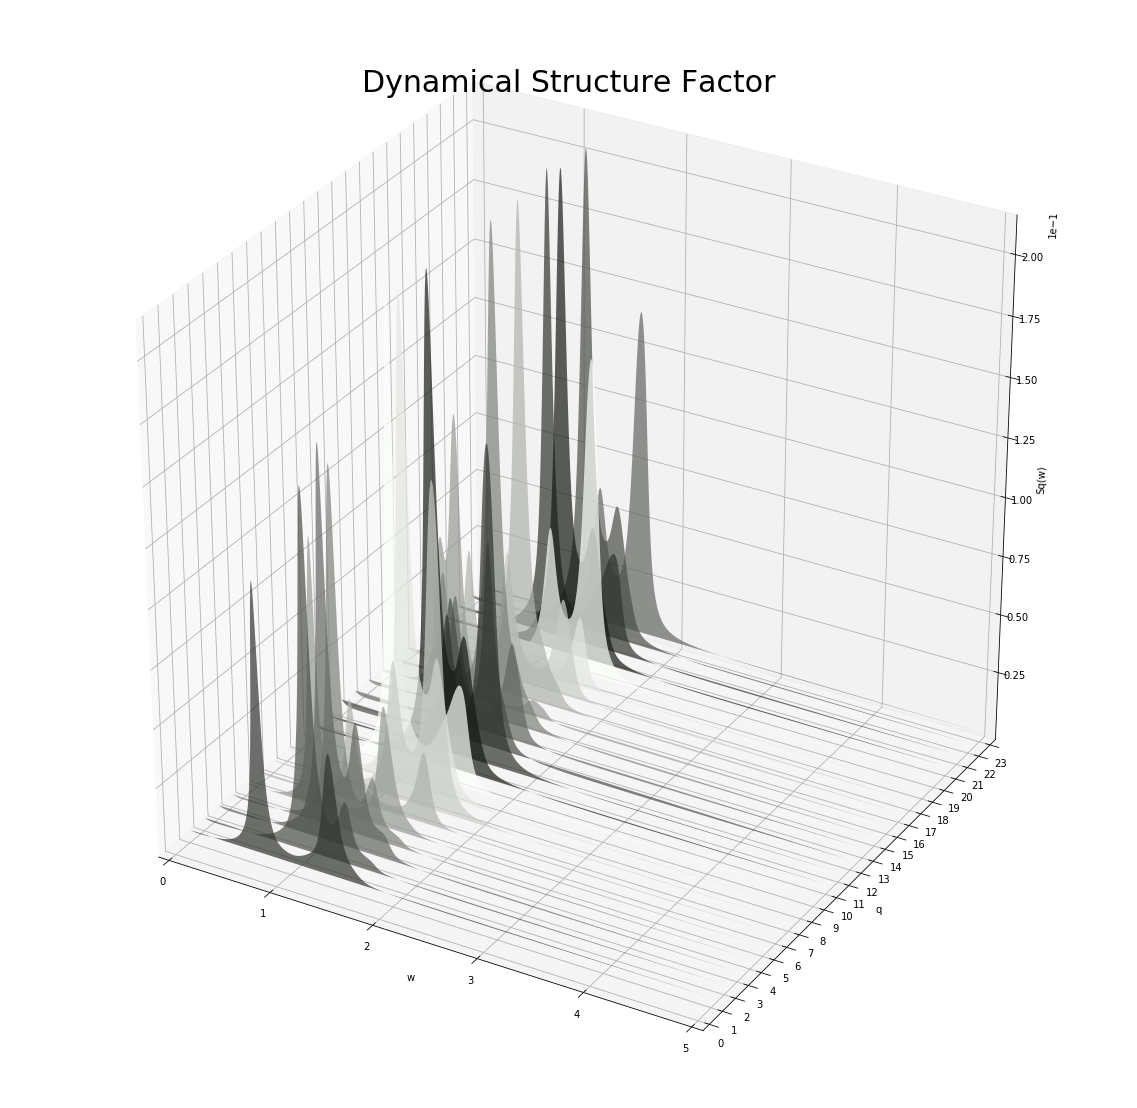

In [15]:
# Maximum value over all Sq(w)
max = 0
for qi in range(nQ):
    tmp_max = Sw[:,qi].max()
    if tmp_max >= max:
        max = tmp_max

# q values for plotting
q = np.linspace(0,nQ-1,nQ)

# Prepare data for 3D plot
verts = []
for qi in range(nQ):
    verts.append(list(zip(w,Sw[:,qi])))

# Set colors
fc = []
for qi in range(nQ):
    fc.append(((qi%10)*0.1+0.09, (qi%10)*0.1+0.1, (qi%10)*0.1+0.08))

# Define the 3D plot
poly = PolyCollection(verts, facecolors = fc)
poly.set_alpha(0.7)

fig2 = plt.figure(figsize=(20,20))
ax2  = fig2.add_subplot(111, projection='3d')
ax2.add_collection3d(poly, zs=q, zdir='y')

# Plot details
ax2.set_title('Dynamical Structure Factor', fontsize=30)
ax2.ticklabel_format(axis='z', style='sci', scilimits=(0,0))

ax2.set_xlim3d(w.min(), w.max())
ax2.set_xlabel('w')
ax2.set_ylim3d(q.min(), q.max())
ax2.set_ylabel('q')
ax2.set_yticks(np.arange(0,nQ,1))
ax2.set_zlim3d(Sw[:,2].min(), max)
ax2.set_zlabel('Sq(w)')

plt.show()